In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/sample_data/Healthcare-Diabetes.csv")  # Change file path if necessary


# Display the first 5 rows
df.head()


Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [14]:
# Display basic info
df.info()

# Show summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.325669    11.777230   
min       0.000000     0.000000                  0.078000    21.000000   
25%       0.000000    27.300000                  0.244000    24.000000   
50%      37.000000    32.200000                  0.375000    29.000000   
75%     130.000000    36.625000                  0.624000    40.000000   
max     846.000000    80.600000                  2.420000    81.000000   

           Outcome  
count  2768.000000  
mean      0.343931  
std       0.475104  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [ ]:
# Check for missing values (NaN)
df.isnull().sum()


Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# List columns where 0 might indicate missing data
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Count zeros in these columns
(df[cols_with_zeros] == 0).sum()


Glucose            18
BloodPressure     125
SkinThickness     800
Insulin          1330
BMI                39
dtype: int64

In [6]:
import numpy as np

# Identify columns where 0 should be replaced with NaN
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0s with NaN in the selected columns
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)

# Verify if NaN values exist now
print(df.isnull().sum())


Id                             0
Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


In [23]:

df.fillna(df.mean(), inplace=True)

# Verify if NaN values are replaced
print(df.isnull().sum())



Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [24]:
# Check data types of each column
df.dtypes



Id                            int64
Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# Show summary statistics
df.describe()


Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.863439      72.385838      29.205925   
std     799.197097     3.323801    30.503499      11.988549       9.032220   
min       1.000000     0.000000    44.000000      24.000000       7.000000   
25%     692.750000     1.000000    99.000000      64.000000      25.000000   
50%    1384.500000     3.000000   117.000000      72.000000      29.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean    140.669798    32.593895                  0.471193    33.132225   
std      82.887979     7.103462                  0.325669    11.777230   
min      14.000000    18.200000                  0.078000    21.000000   
25%     120.000000    27.575000                  0.244000    24.000000   
50%     126.000000    32.400000                  0.375000    29.000000   
75%     130.000000    36.625000                  0.624000    40.000000   
max     846.000000    80.600000                  2.420000    81.000000   

           Outcome  
count  2768.000000  
mean      0.343931  
std       0.475104  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

from matplotlib import pyplot as plt
_df_17['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Id', y='Pregnancies', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='BloodPressure', y='SkinThickness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Pregnancies'].plot(kind='line', figsize=(8, 4), title='Pregnancies')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Glucose'].plot(kind='line', figsize=(8, 4), title='Glucose')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['BloodPressure'].plot(kind='line', figsize=(8, 4), title='BloodPressure')
plt.gca().spines[['top', 'right']].set_visible(False)

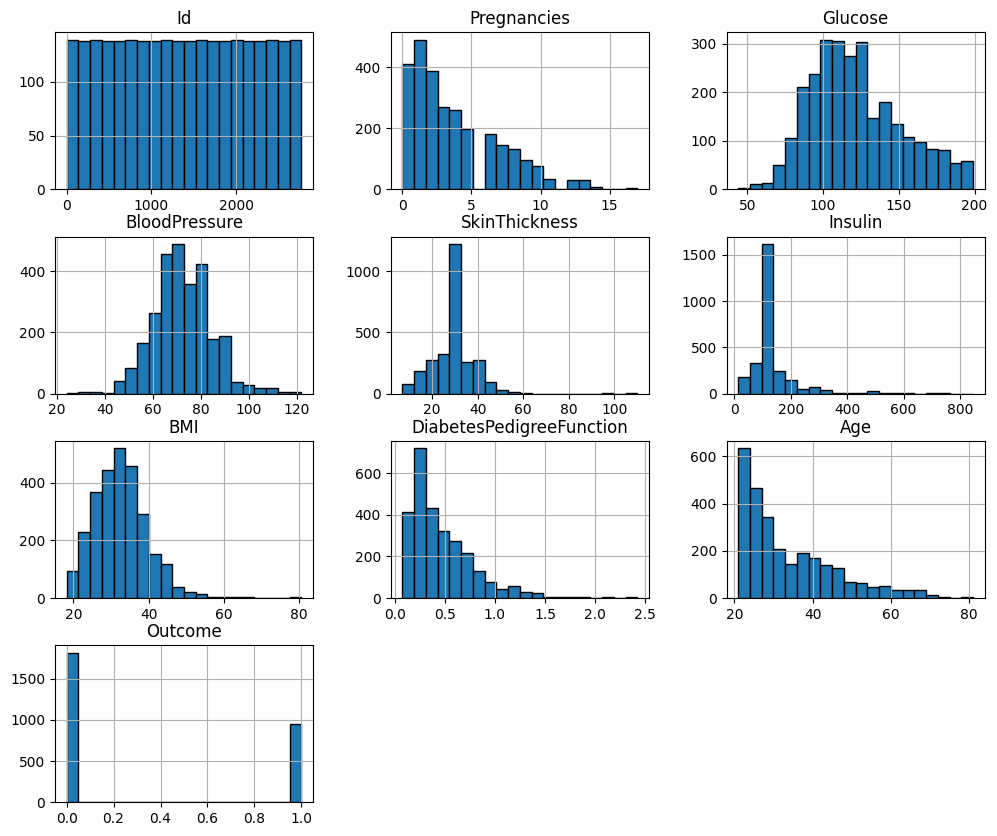

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical columns
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.show()


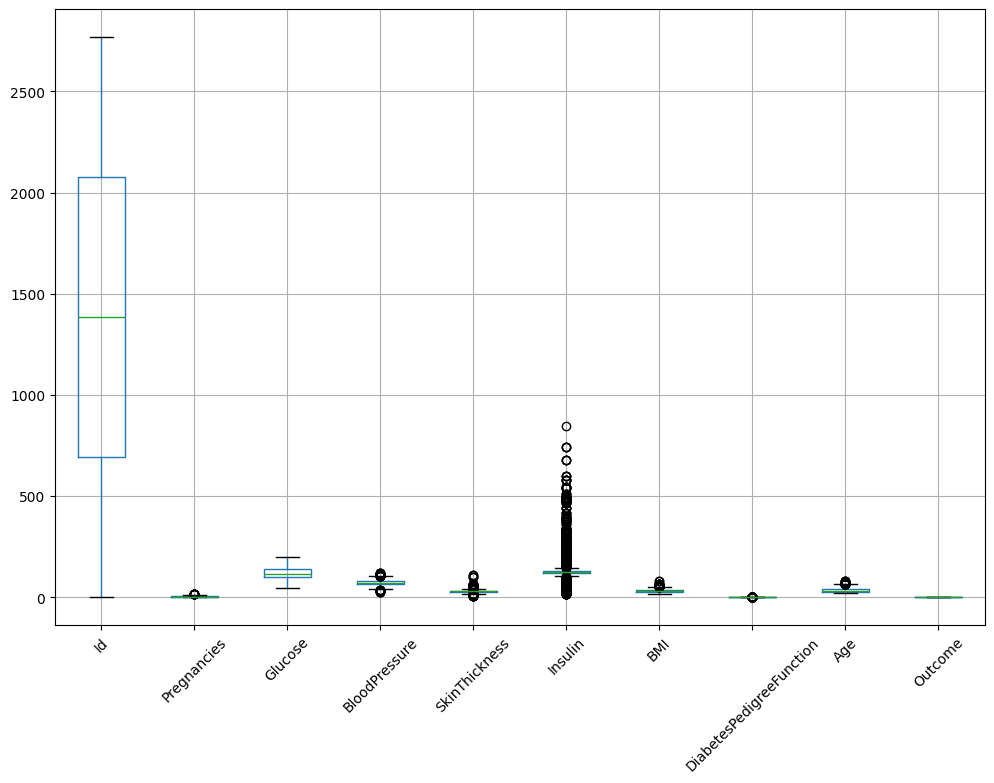

In [ ]:
# Boxplots for all numerical columns
plt.figure(figsize=(12, 8))
df.boxplot()
plt.xticks(rotation=45)
plt.show()


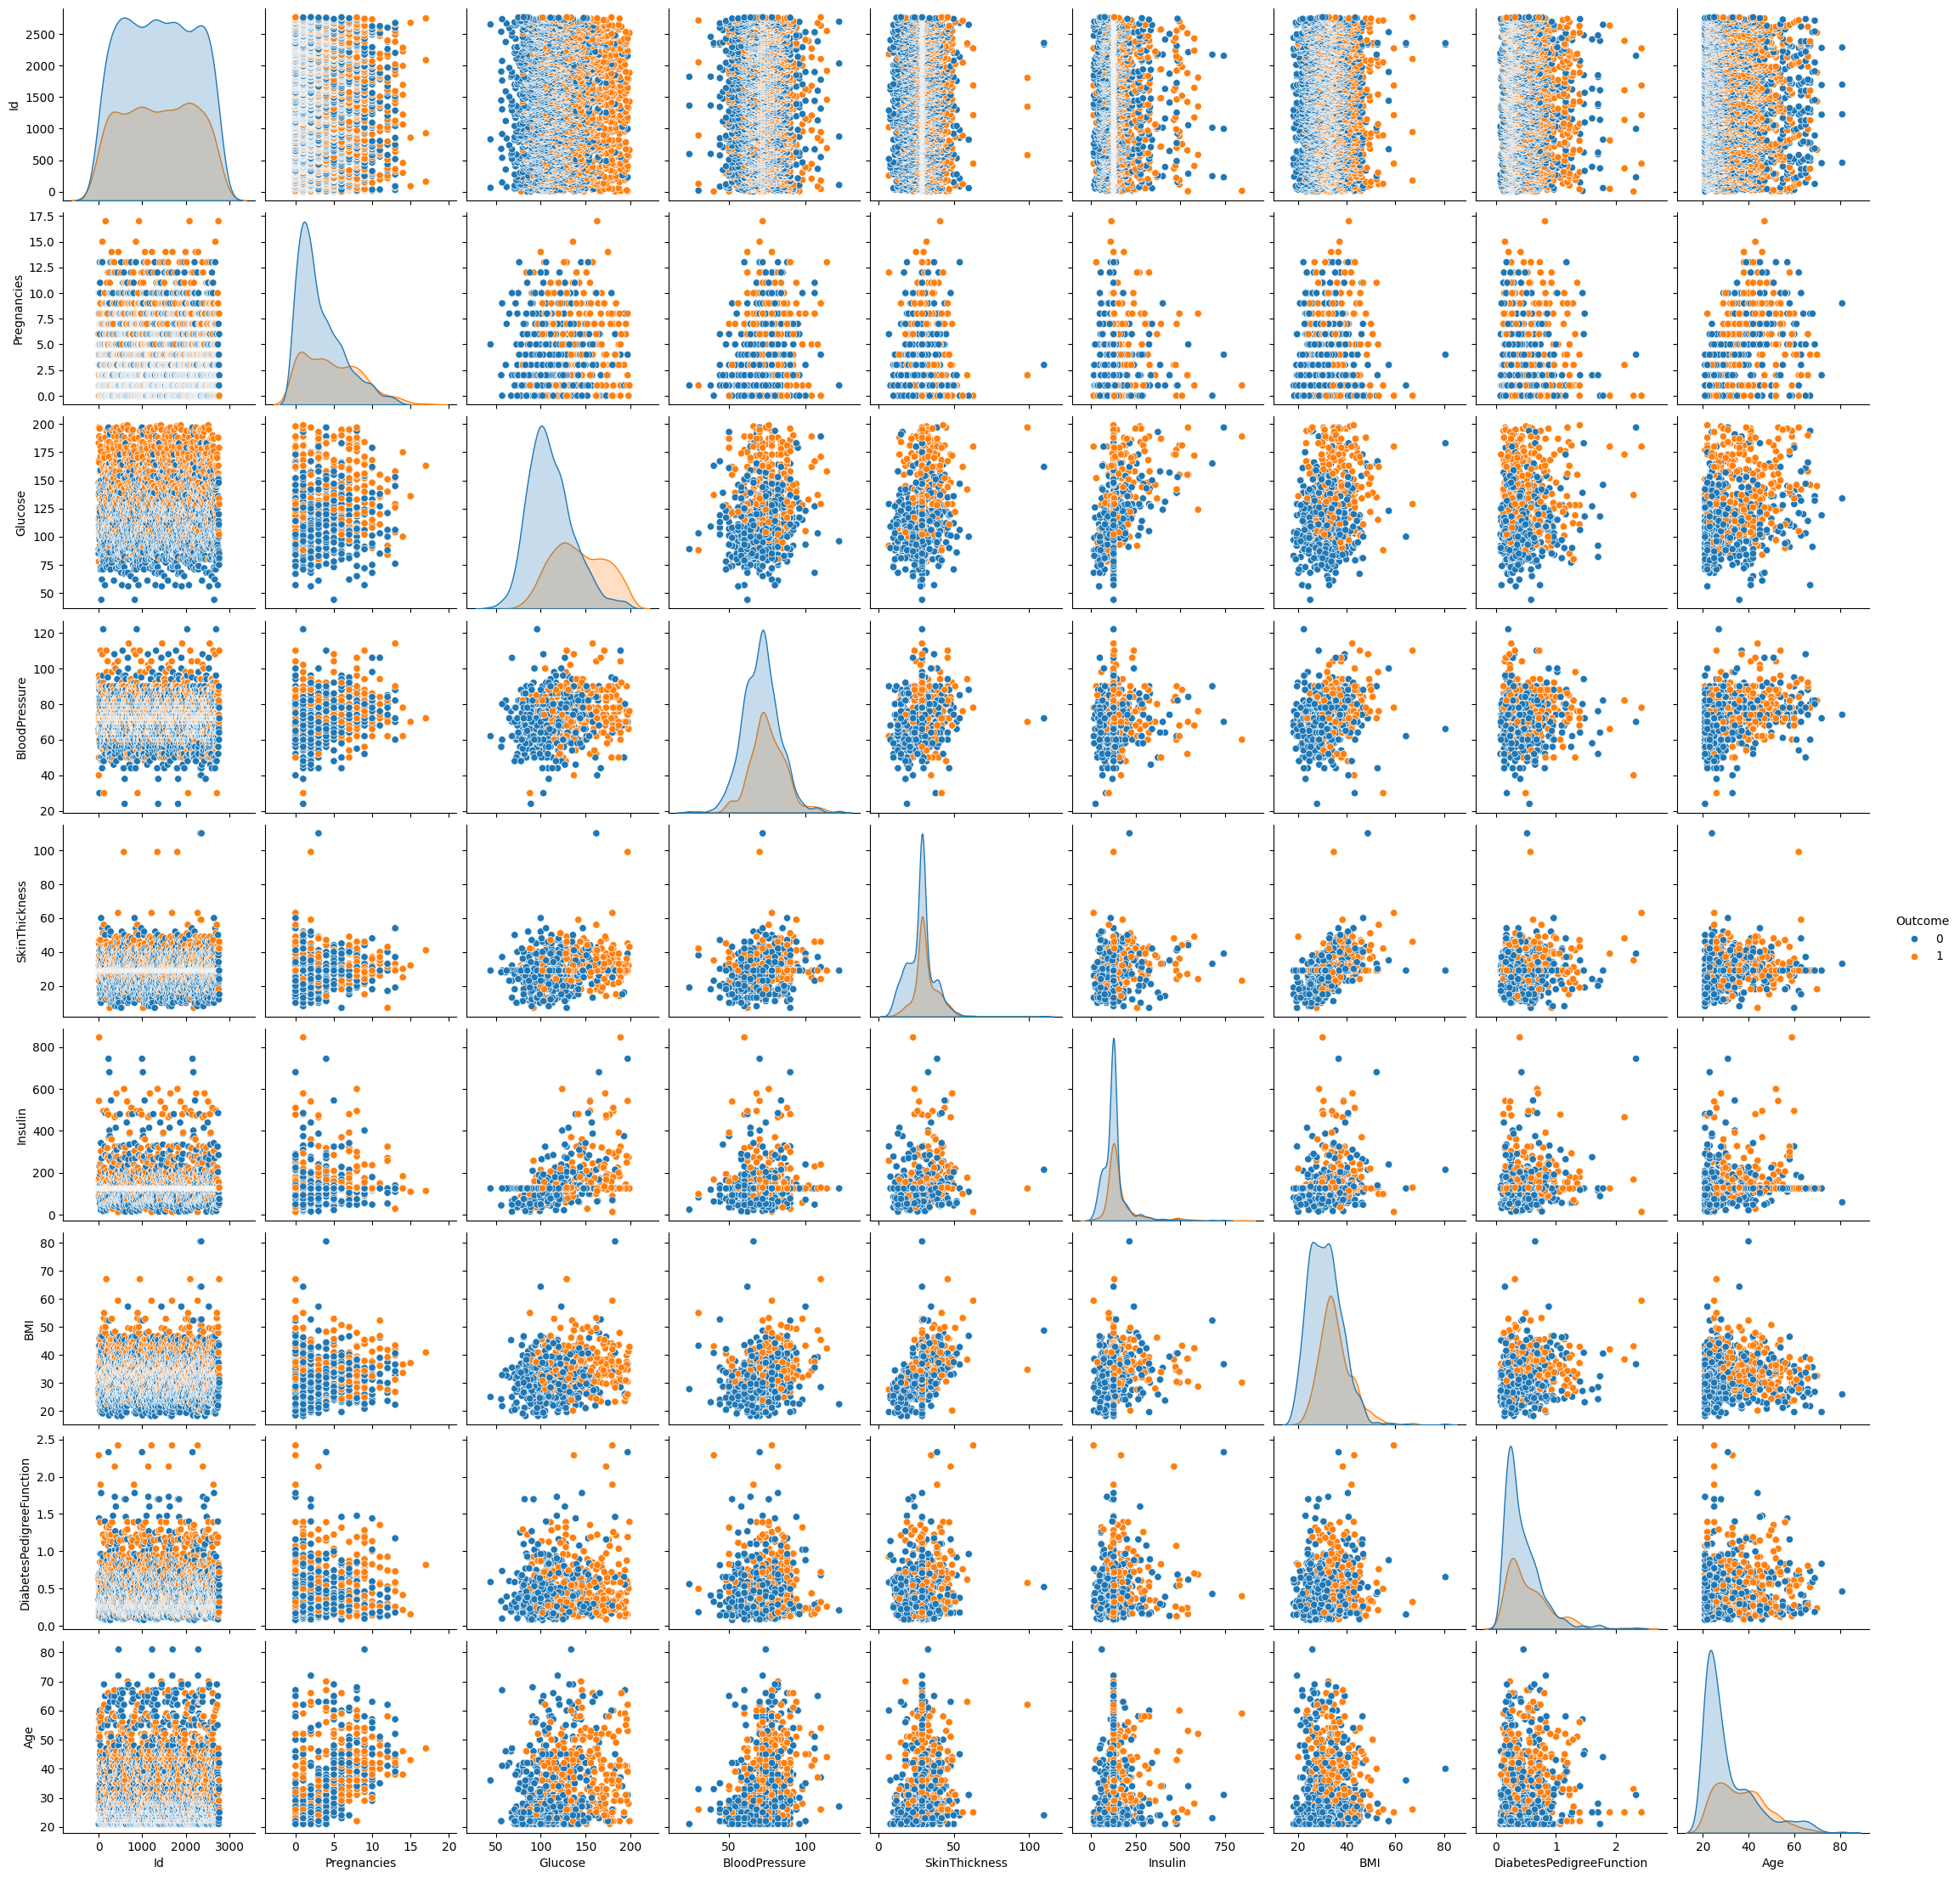

In [ ]:
sns.pairplot(df, hue="Outcome", diag_kind="kde")
plt.show()


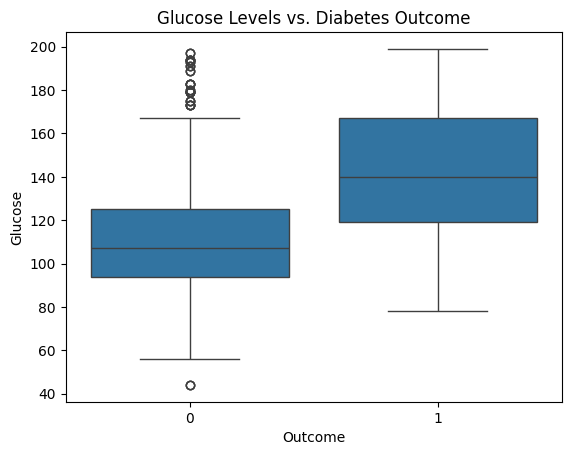

In [ ]:
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Glucose Levels vs. Diabetes Outcome")
plt.show()


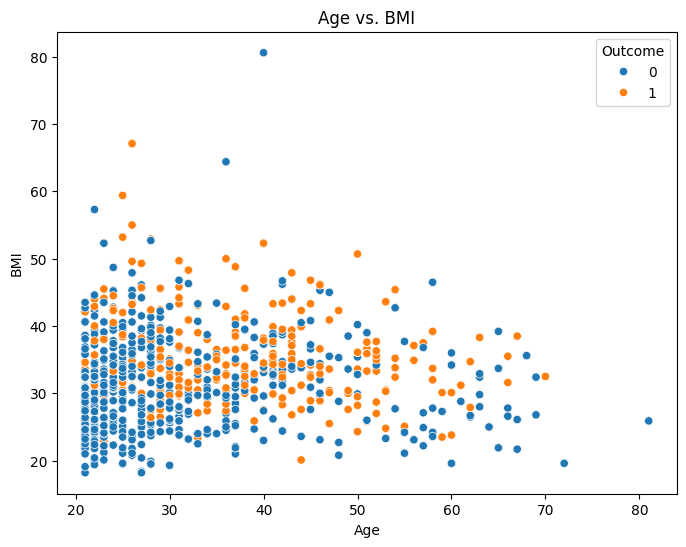

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="BMI", hue="Outcome", data=df)
plt.title("Age vs. BMI")
plt.show()


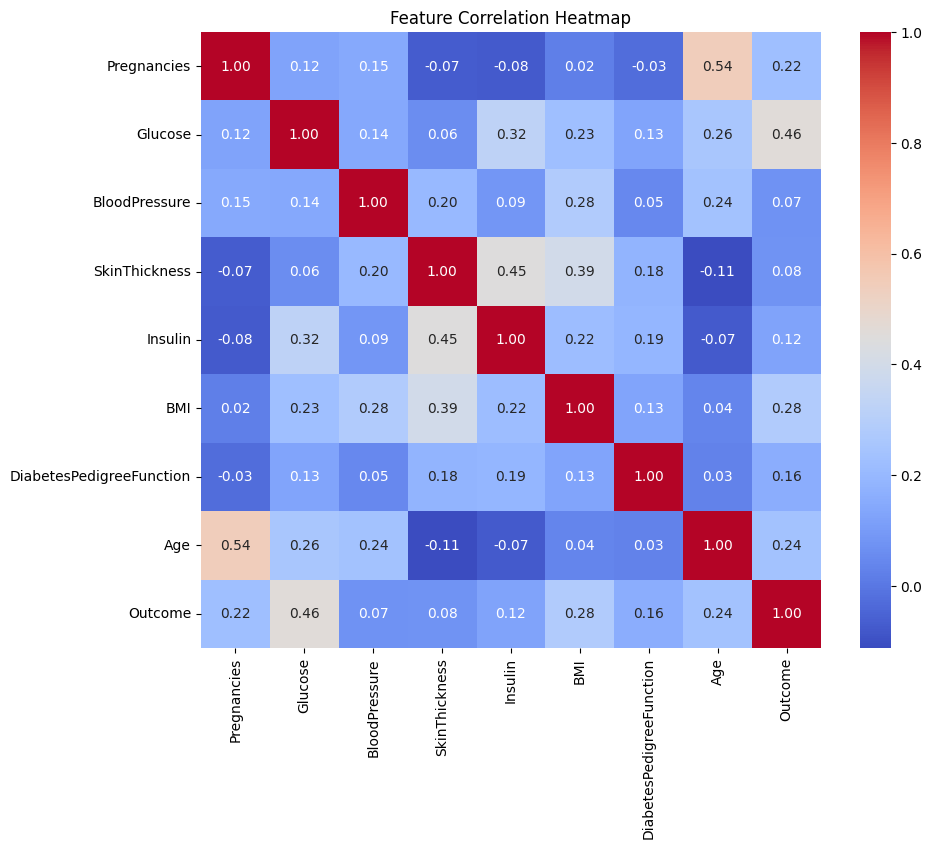

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
df.drop(columns=['Id'], inplace=True)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7707581227436823

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       363
           1       0.72      0.55      0.62       191

    accuracy                           0.77       554
   macro avg       0.75      0.72      0.73       554
weighted avg       0.77      0.77      0.76       554



<ipython-input-48-500fdcef74ff>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




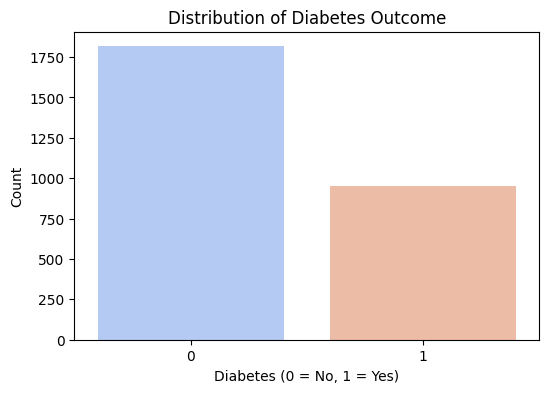

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=df["Outcome"], palette="coolwarm")
plt.title("Distribution of Diabetes Outcome")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [20]:
import plotly.express as px

fig = px.histogram(df, x="Glucose", nbins=30, color="Outcome", barmode="overlay",
                   title="Distribution of Glucose Levels by Diabetes Outcome")
fig.show()


In [ ]:
fig = px.scatter(df, x="BMI", y="Age", color="Outcome",
                 title="BMI vs Age - Diabetes Outcome", hover_data=["Glucose"])
fig.show()


In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
output_notebook()

source = ColumnDataSource(df)

p = figure(title="Insulin vs. Glucose", x_axis_label="Glucose", y_axis_label="Insulin")
p.circle(x="Glucose", y="Insulin", source=source, size=6, color="blue", alpha=0.5)

show(p)


In [ ]:
import plotly.express as px

fig = px.scatter(df, x="BMI", y="Age", color="Outcome",
                 title="BMI vs Age - Diabetes Outcome", hover_data=["Glucose"])
fig.update_layout(legend_title_text="Diabetes Outcome",
                  legend=dict(title_font_size=14, font_size=12, bordercolor="Black", borderwidth=1))
fig.show()


In [21]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Legend, LegendItem
from bokeh.io import output_notebook
from bokeh.layouts import column

output_notebook()

# Create data sources for each category
source_0 = ColumnDataSource(df[df["Outcome"] == 0])
source_1 = ColumnDataSource(df[df["Outcome"] == 1])

# Create figure
p = figure(title="Insulin vs. Glucose", x_axis_label="Glucose", y_axis_label="Insulin")

# Scatter plot for each class
circle_0 = p.circle(x="Glucose", y="Insulin", source=source_0, size=6, color="blue", alpha=0.5, legend_label="No Diabetes")
circle_1 = p.circle(x="Glucose", y="Insulin", source=source_1, size=6, color="red", alpha=0.5, legend_label="Diabetes")

# Make the legend interactive
p.legend.click_policy = "hide"

show(p)


<ipython-input-35-57cf570924a4>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




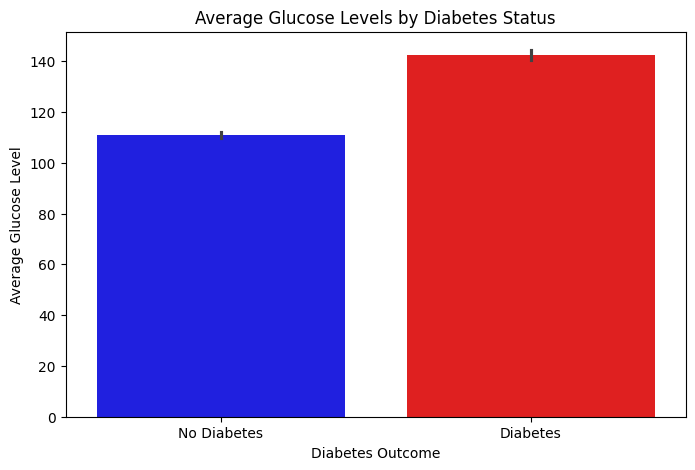

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x="Outcome", y="Glucose", data=df, palette=["blue", "red"])
plt.xticks([0,1], ["No Diabetes", "Diabetes"])
plt.xlabel("Diabetes Outcome")
plt.ylabel("Average Glucose Level")
plt.title("Average Glucose Levels by Diabetes Status")
plt.show()


                Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.325669    11.777230   
m

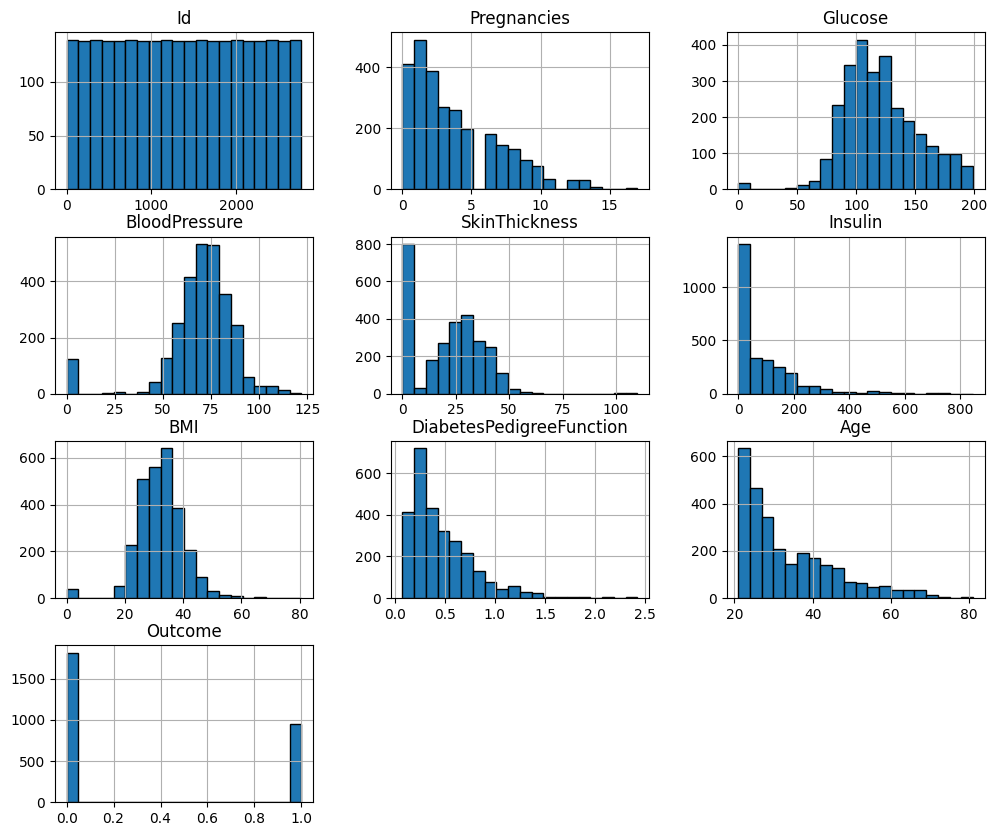

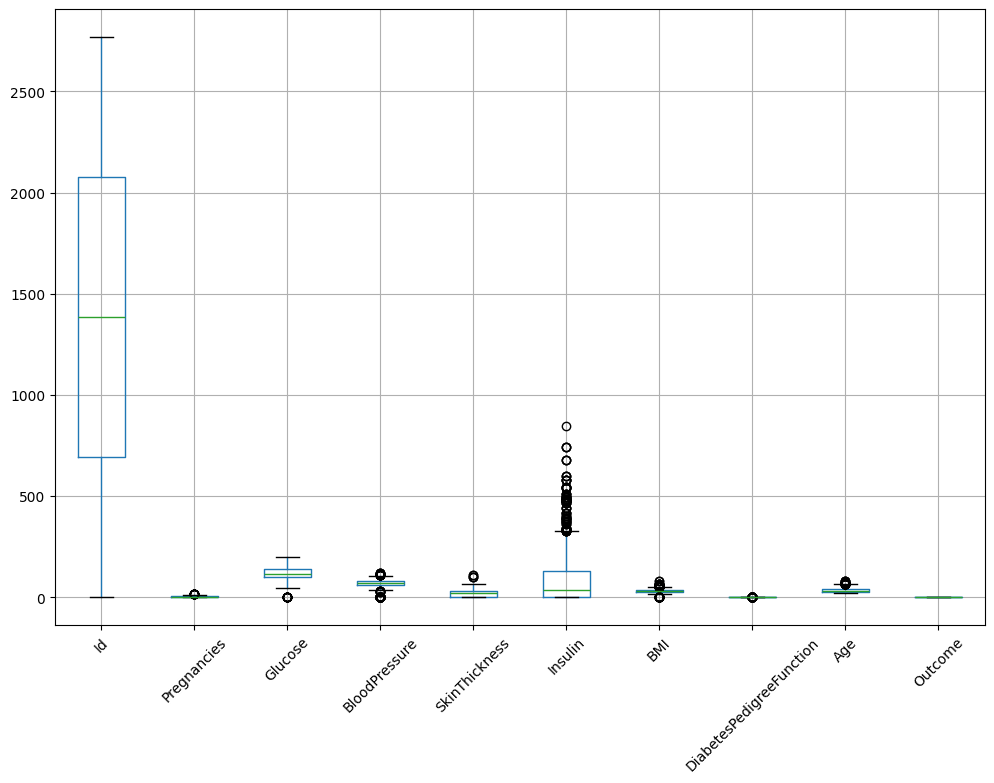

In [4]:
# Summary statistics
print(df.describe())

# Histogram to visualize distributions
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12, 8))
df.boxplot()
plt.xticks(rotation=45)
plt.show()


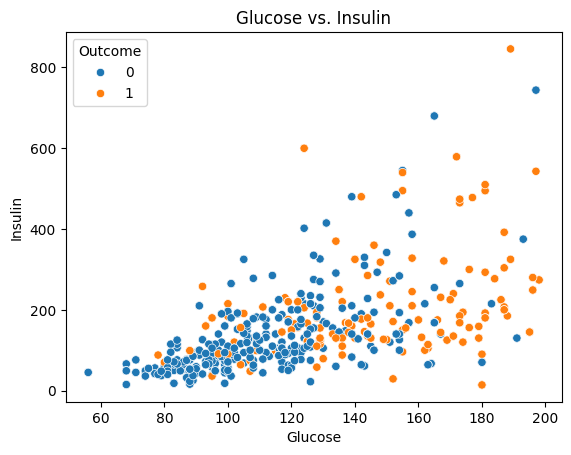

In [7]:
# Scatter plot of Glucose vs. Insulin
sns.scatterplot(x=df["Glucose"], y=df["Insulin"], hue=df["Outcome"])
plt.title("Glucose vs. Insulin")
plt.show()


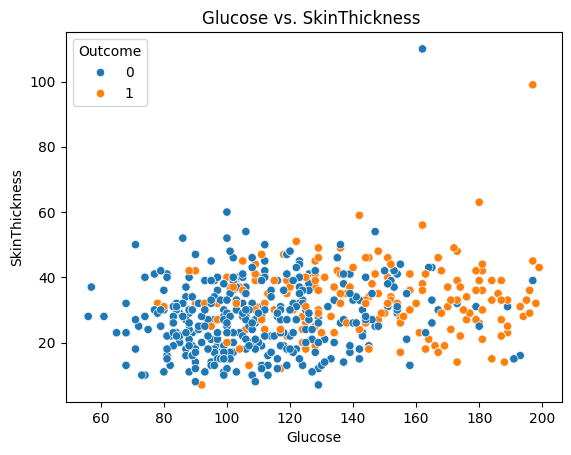

In [9]:
# Scatter plot of Glucose vs. SkinThicknessZ
sns.scatterplot(x=df["Glucose"], y=df["SkinThickness"], hue=df["Outcome"])
plt.title("Glucose vs. SkinThickness ")
plt.show()
